In [1]:
#Importing the sklearn face of celbrity dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [2]:
#Importing all the necessary libraries for the CNN network and for the normal Logistic Regression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Flatten, Dropout
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#Verify the name of the celebrity and the shape of the input image
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [4]:
#Creating the input X variable and the output y variable and creating a 8 vector matrix for the output variable
X = faces.images
y = faces.target
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
y = y.reshape(X.shape[0], 1)

yy = pd.DataFrame(y)
yy.columns = ["Trgt"]
Y = pd.get_dummies(yy["Trgt"], prefix='target')
y=np.array(Y)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(1348, 62, 47, 1)
(1348, 8)


In [5]:
#Convolutional Neural Network installation and establishing the other needed layers of Covolutional filters,
#MaxPoolng, Hidden layers and compilation layer
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(62,47,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
#Model fit of the training dataset
H1 = model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.2)

Train on 862 samples, validate on 216 samples
Epoch 1/150
862/862 [==============================] - 8s 10ms/step - loss: 8.4213 - acc: 0.1543 - val_loss: 2.0609 - val_acc: 0.3426
Epoch 2/150
862/862 [==============================] - 6s 6ms/step - loss: 2.0480 - acc: 0.2448 - val_loss: 2.0391 - val_acc: 0.3981
Epoch 3/150
862/862 [==============================] - 6s 6ms/step - loss: 2.0148 - acc: 0.2343 - val_loss: 1.9690 - val_acc: 0.3935
Epoch 4/150
862/862 [==============================] - 6s 6ms/step - loss: 1.9707 - acc: 0.2819 - val_loss: 1.9502 - val_acc: 0.4028
Epoch 5/150
862/862 [==============================] - 5s 6ms/step - loss: 1.9250 - acc: 0.3225 - val_loss: 1.8762 - val_acc: 0.3981
Epoch 6/150
862/862 [==============================] - 6s 6ms/step - loss: 1.9107 - acc: 0.3167 - val_loss: 1.8792 - val_acc: 0.3981
Epoch 7/150
862/862 [==============================] - 6s 6ms/step - loss: 1.8369 - acc: 0.3619 - val_loss: 1.7340 - val_acc: 0.3981
Epoch 8/150
862/862 [=

Epoch 62/150
862/862 [==============================] - 6s 6ms/step - loss: 0.3457 - acc: 0.8654 - val_loss: 1.9671 - val_acc: 0.7315
Epoch 63/150
862/862 [==============================] - 6s 6ms/step - loss: 0.2802 - acc: 0.8886 - val_loss: 1.4384 - val_acc: 0.7593
Epoch 64/150
862/862 [==============================] - 6s 7ms/step - loss: 0.2691 - acc: 0.9026 - val_loss: 1.3305 - val_acc: 0.7685
Epoch 65/150
862/862 [==============================] - 6s 6ms/step - loss: 0.2585 - acc: 0.9142 - val_loss: 1.3075 - val_acc: 0.7500
Epoch 66/150
862/862 [==============================] - 6s 6ms/step - loss: 0.3081 - acc: 0.9084 - val_loss: 1.3424 - val_acc: 0.7731
Epoch 67/150
862/862 [==============================] - 5s 6ms/step - loss: 0.2485 - acc: 0.8991 - val_loss: 1.4655 - val_acc: 0.7593
Epoch 68/150
862/862 [==============================] - 6s 6ms/step - loss: 0.4016 - acc: 0.8968 - val_loss: 1.3966 - val_acc: 0.7639
Epoch 69/150
862/862 [==============================] - 5s 6ms

Epoch 123/150
862/862 [==============================] - 5s 6ms/step - loss: 0.0276 - acc: 0.9884 - val_loss: 1.6023 - val_acc: 0.8333
Epoch 124/150
862/862 [==============================] - 6s 6ms/step - loss: 0.0372 - acc: 0.9814 - val_loss: 1.5942 - val_acc: 0.8287
Epoch 125/150
862/862 [==============================] - 5s 6ms/step - loss: 0.0196 - acc: 0.9954 - val_loss: 1.6233 - val_acc: 0.8241
Epoch 126/150
862/862 [==============================] - 6s 7ms/step - loss: 0.0527 - acc: 0.9814 - val_loss: 1.6443 - val_acc: 0.8241
Epoch 127/150
862/862 [==============================] - 5s 6ms/step - loss: 0.0417 - acc: 0.9814 - val_loss: 1.7024 - val_acc: 0.8102
Epoch 128/150
862/862 [==============================] - 6s 6ms/step - loss: 0.0381 - acc: 0.9884 - val_loss: 1.7151 - val_acc: 0.8241
Epoch 129/150
862/862 [==============================] - 5s 6ms/step - loss: 0.0537 - acc: 0.9803 - val_loss: 1.5932 - val_acc: 0.8333
Epoch 130/150
862/862 [==============================] 

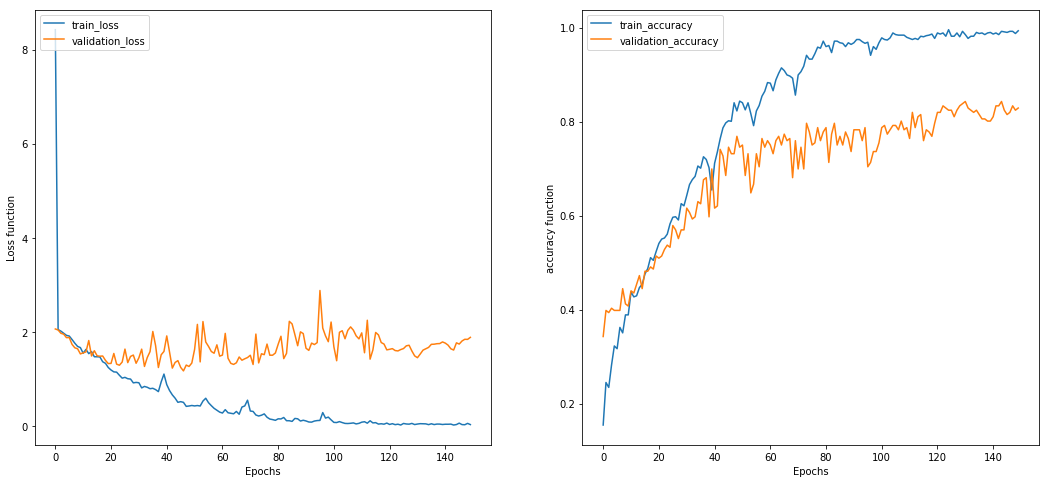

In [7]:
#Plotting the resultant loss and the accuracy of the training and validation model
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train_loss')
plt.plot(H1.history["val_loss"], label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["acc"], label='train_accuracy')
plt.plot(H1.history["val_acc"], label='validation_accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy function")
plt.legend(loc='upper left')
plt.show()

In [9]:
#Model Evaluation of test dataset acquring 95.3% accuracy
y_pred = model.predict(X_test)
print("The accuracy of the predicted value from the model against the test value:", (1-np.mean(np.abs(y_pred-y_test)))*100)
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss value of the test dataset", loss)
print("The accuracy value of the test dataset:", accuracy*100)

The accuracy of the predicted value from the model against the test value: 95.30208259820938
270/270 [==============================] - 1s 2ms/step
The loss value of the test dataset 2.0090635142944477
The accuracy value of the test dataset: 82.59259246013782


In [10]:
#Holistic Logistic Regression analysis of the dataset and the model evaluation
X_l = faces.data
y_l = faces.target

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.20, random_state=42)

logreg = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=42)
logreg = logreg.fit(X_train_l, y_train_l)
print("The accuracy of the training model", logreg.score(X_train_l, y_train_l))
y_pred = logreg.predict(X_test_l)
print("The accuracy of the predicted value over the test value", 100 - np.mean(np.abs(y_pred - y_test_l)))

C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

The accuracy of the training model 1.0
The accuracy of the predicted value over the test value 99.54444444444445


C:\Users\Lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
